In [63]:
import pandas as pd


In [64]:
df = pd.read_csv("/home/devjith/Luminar/Machine Learning/files/Country-data.csv")

In [65]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [66]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [67]:
df = df.drop(columns='country')

In [68]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [69]:
x = df.iloc[:,:]

from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    data = KMeans(n_clusters=i,init='k-means++',random_state=42)
    data.fit(x)
    wcss.append(data.inertia_)
wcss

[117459687469.07817,
 36528387934.3221,
 24462384816.908226,
 14874385989.227549,
 11525045023.411255,
 7903929465.802248,
 5355385080.096138,
 4865333294.644259,
 3787464565.403698,
 2808007858.3097916]

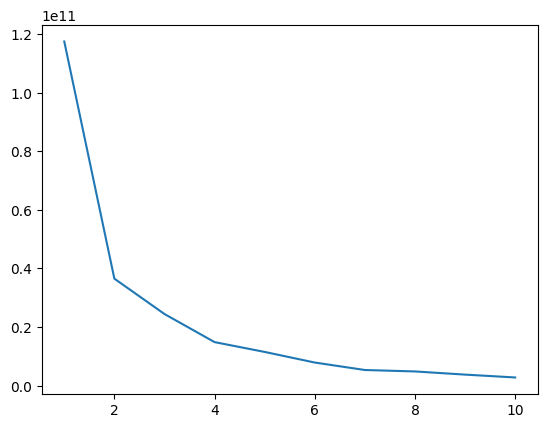

In [70]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [96]:
data1 = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_pred = data1.fit_predict(x)
y_pred

array([0, 0, 0, 0, 2, 2, 0, 4, 4, 0, 2, 2, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2,
       4, 0, 0, 0, 0, 2, 0, 2, 0, 4, 4, 2, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 4, 0, 0, 2, 0, 4, 4, 4, 0, 4, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 3, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 0, 0, 3, 2, 0, 2, 0, 0, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 4, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 4, 4, 2, 0, 0, 2, 0, 0, 0], dtype=int32)

In [97]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

silhouette_score(x,y_pred)

0.6014288291202861

In [98]:
davies_bouldin_score(x,y_pred)

0.6818313696635536

In [99]:
x['clusters'] = y_pred

In [100]:
x

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [105]:
x['clusters'].unique()

array([0, 2, 4, 1, 3], dtype=int32)

In [101]:
from sklearn.model_selection import train_test_split
x1 = x.iloc[:,:-1].values
y = x.iloc[:,-1].values

x_train,x_test,y_train,y_test = train_test_split(x1,y,train_size=0.3,random_state=42)


In [102]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train,y_train)


,priors,None
,var_smoothing,1e-09


In [103]:
y_pred = model.predict(x_test)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        68
           1       0.00      0.00      0.00         3
           2       0.66      0.77      0.71        30
           3       0.33      1.00      0.50         2
           4       0.80      0.86      0.83        14

    accuracy                           0.81       117
   macro avg       0.55      0.70      0.59       117
weighted avg       0.82      0.81      0.81       117



/home/devjith/Luminar/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/devjith/Luminar/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/devjith/Luminar/Machine Learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

0.811965811965812

In [110]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='entropy',random_state=42)

model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)

In [111]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        68
           1       1.00      0.67      0.80         3
           2       0.80      0.93      0.86        30
           3       0.67      1.00      0.80         2
           4       0.88      1.00      0.93        14

    accuracy                           0.91       117
   macro avg       0.87      0.90      0.87       117
weighted avg       0.93      0.91      0.92       117



In [112]:
cm = confusion_matrix(y_test,y_pred)
y_test

array([0, 0, 0, 0, 2, 4, 0, 1, 0, 0, 0, 4, 4, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 1, 4, 0, 2, 2, 0, 0, 0, 0, 0, 4, 0, 2, 0, 4, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 4, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 2, 0, 0, 4, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2,
       4, 0, 4, 0, 0, 0, 4, 2, 2, 3, 2, 0, 0, 0, 2, 4, 2, 2, 0, 0, 2, 0,
       0, 4, 0, 0, 4, 2, 0], dtype=int32)

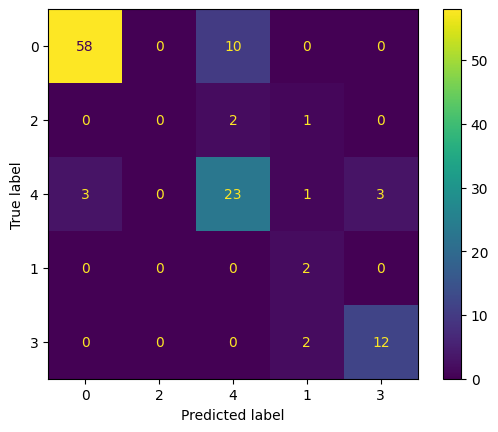

In [115]:
cmd = ConfusionMatrixDisplay(cm,display_labels=[0,2,4,1,3])
cmd.plot()